In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
from spg_overlay.utils.constants import DRONE_INITIAL_HEALTH
from collections import defaultdict


In [16]:
with open("benchmarks/res10.json", "r") as f:
    data = json.load(f)
print(f"{len(data)} items found")


200 items found


In [17]:
score_names = ["score","percent_rescued","score_timestep","score_health_returned","score_exploration","percent_drones_destroyed", "mean_drones_health"]

scores = {name:{} for name in score_names}
for d in data:
    for name in score_names:
        map_name = d["map_name"]+"\n"+d["zones"]
        if map_name not in scores[name]:
            scores[name][map_name] = []
        scores[name][map_name].append(d[name])
        
for map_name in scores["mean_drones_health"]:
    scores["mean_drones_health"][map_name] = [100*x/DRONE_INITIAL_HEALTH for x in scores["mean_drones_health"][map_name]]

In [18]:
for map_name in scores["score"]:
    print(map_name.replace('\n', '_'), len(scores["score"][map_name]))

MyMapFinal2022_23_no_gps_zone 20
MyMapFinal2022_23_none 20
MyMapFinal2022_23_no_com_zone 20
MyMapFinal2022_23_kill_zone 20
MyMapFinal_2023_24_01_none 20
MyMapFinal_2023_24_02_none 20
MyMapFinal_2023_24_03_none 20
MyMapFinal_2023_24_01_no_com_zone 20
MyMapFinal_2023_24_02_kill_zone 20
MyMapFinal_2023_24_03_no_gps_zone 20


In [25]:
has_crashed = []
for info in data:
    if info["has_crashed"]:
        has_crashed.append(info)
        
print(f"{len(has_crashed)} runs have crashed")
for info in has_crashed:
    print(info["stdout_file"])

3 runs have crashed
/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/ac81518b-3d4f-4f00-a0e4-4afecb47d09c_map_MyMapFinal_2023_24_02_zone_KILL_ZONE/log.txt
/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/356651ed-1d71-4469-b447-33fb2c2e29e1_map_MyMapFinal_2023_24_03_zone_NO_GPS_ZONE/log.txt
/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/c15644db-14e3-444b-9d74-a9e326149f32_map_MyMapFinal_2023_24_03_zone_NO_GPS_ZONE/log.txt


In [19]:
def plot_score(scores, title:str):
    # Prepare data for boxplot
    keys = sorted(scores.keys()) 
    values = [scores[key] for key in keys]
    
    # Create the boxplot
    plt.figure(figsize=(10, 8))
    boxplot = plt.boxplot(values, labels=keys, patch_artist=True, showmeans=False, 
                          boxprops=dict(facecolor='skyblue', color='blue'),
                          whis=[0, 100])
    
    # Add labels and title
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0,100)
    
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


Mean score: 76.31241954878575
Old score: 77.5885036757699


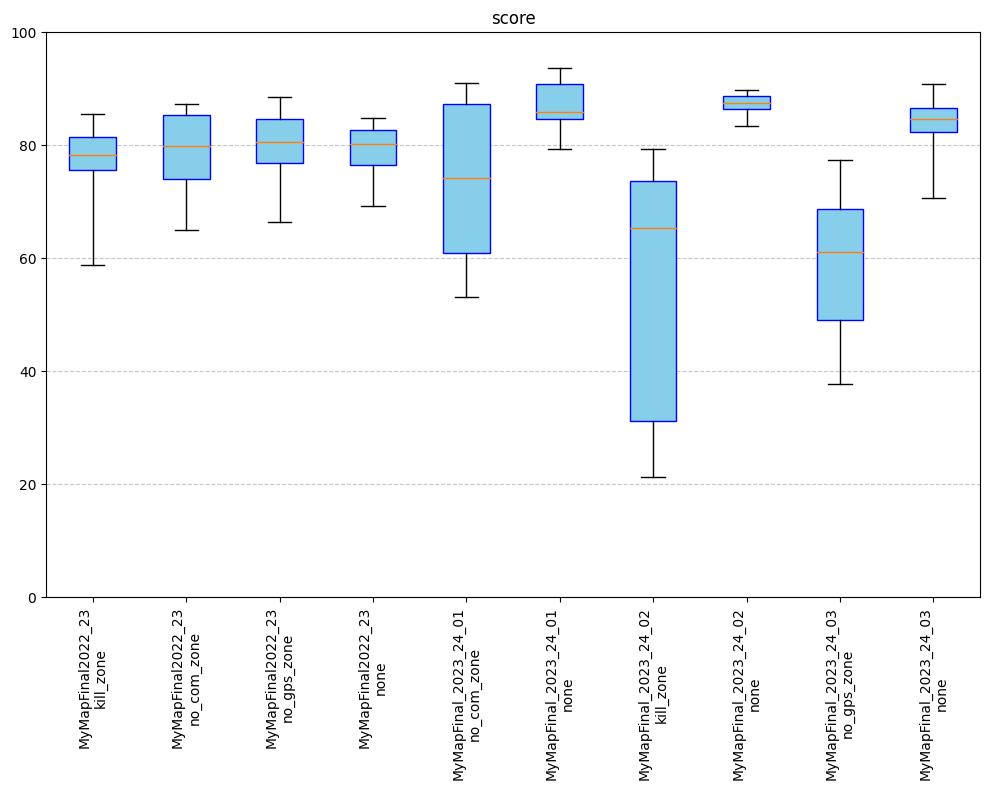

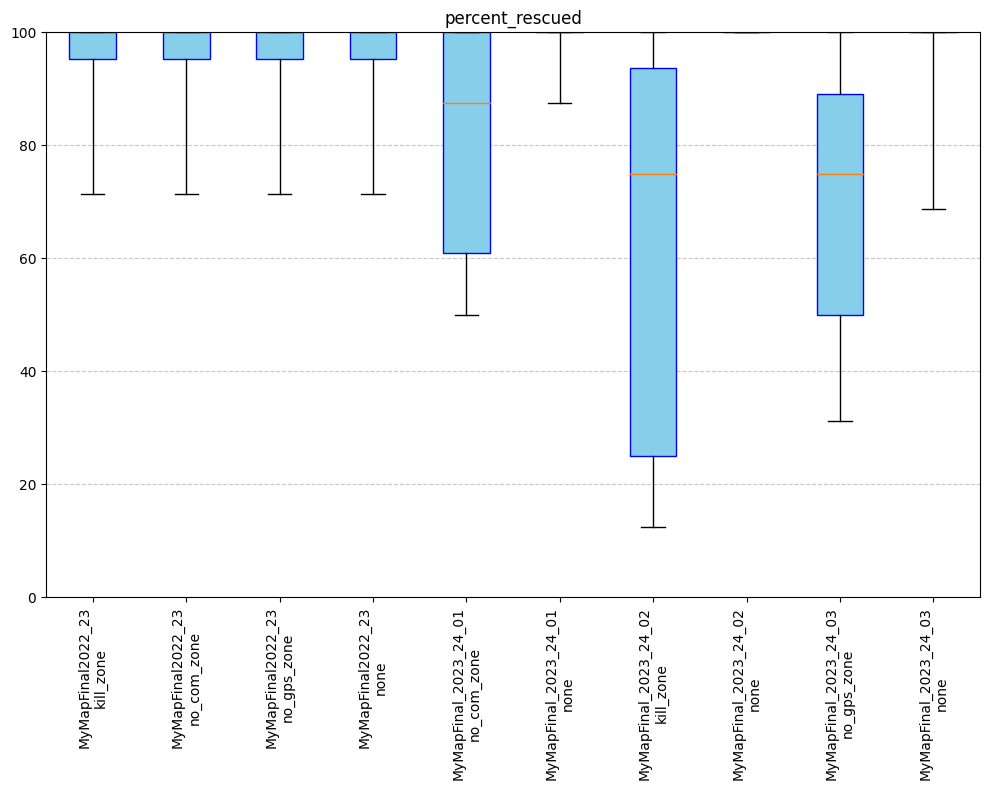

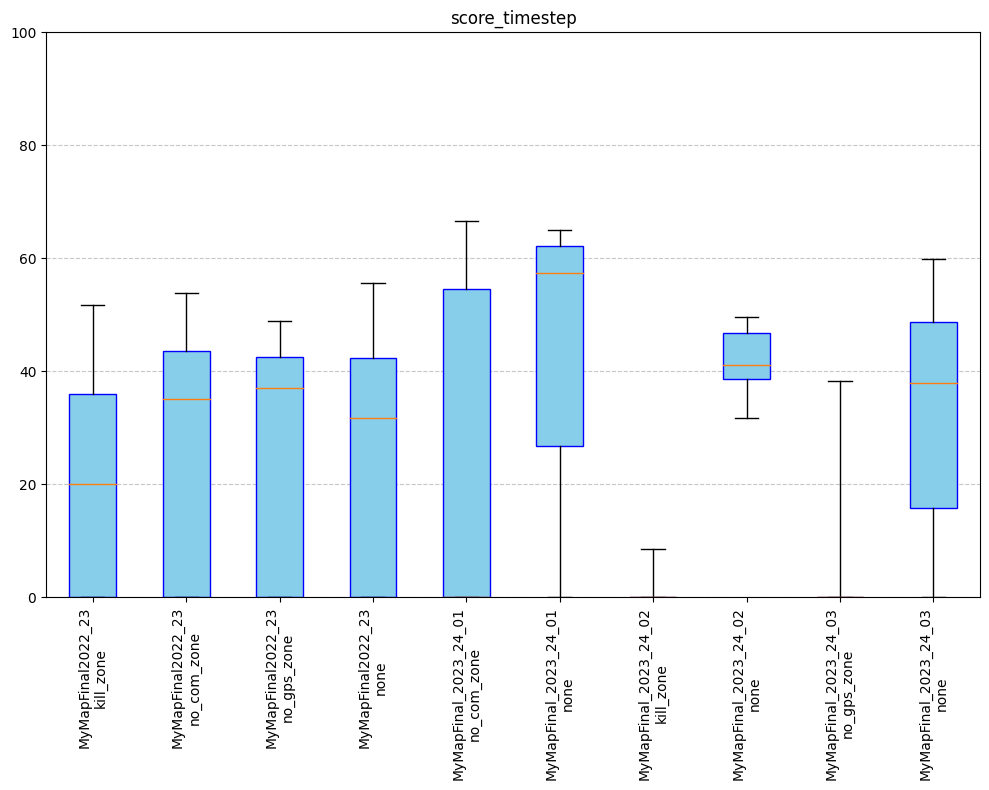

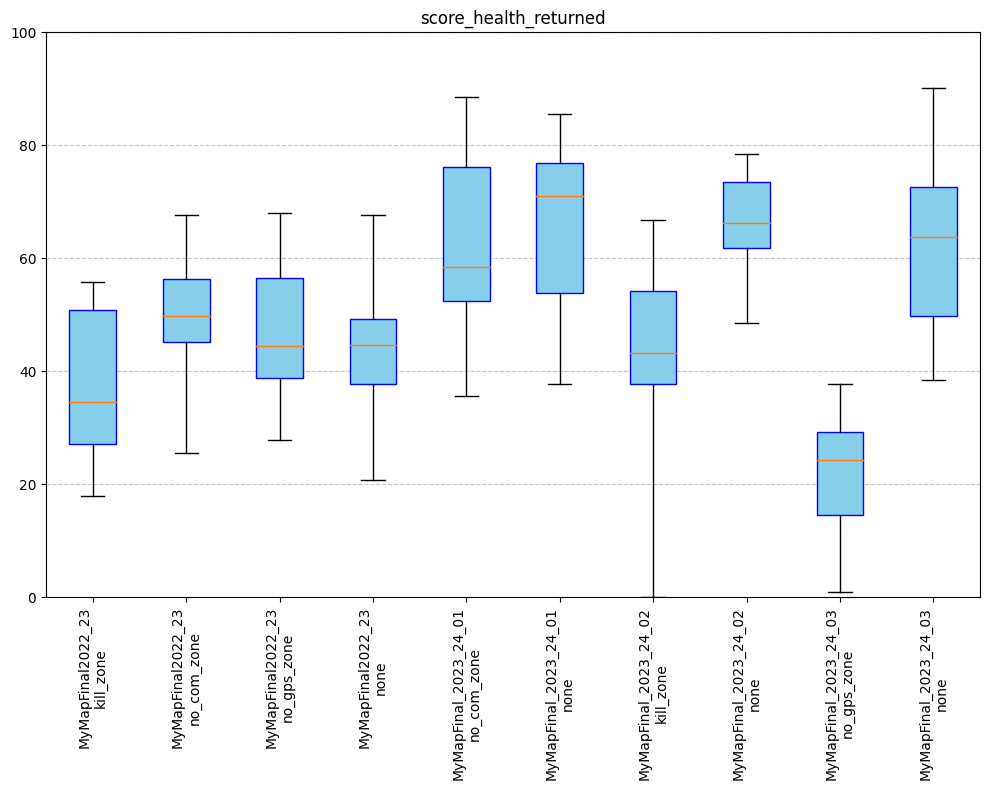

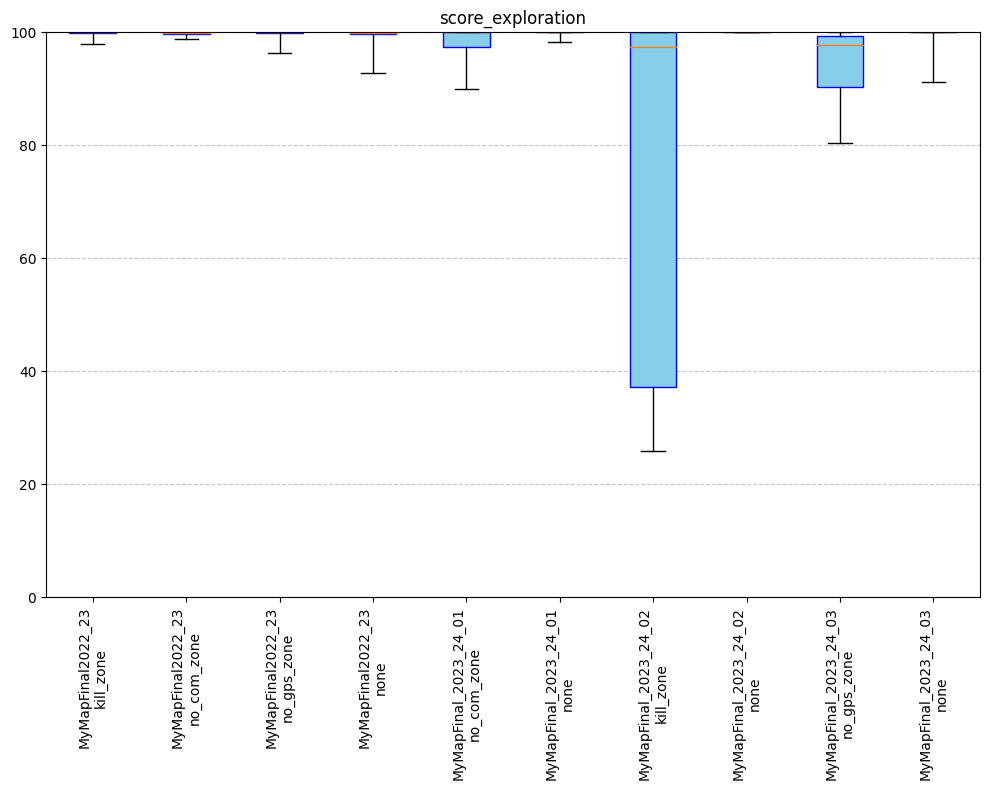

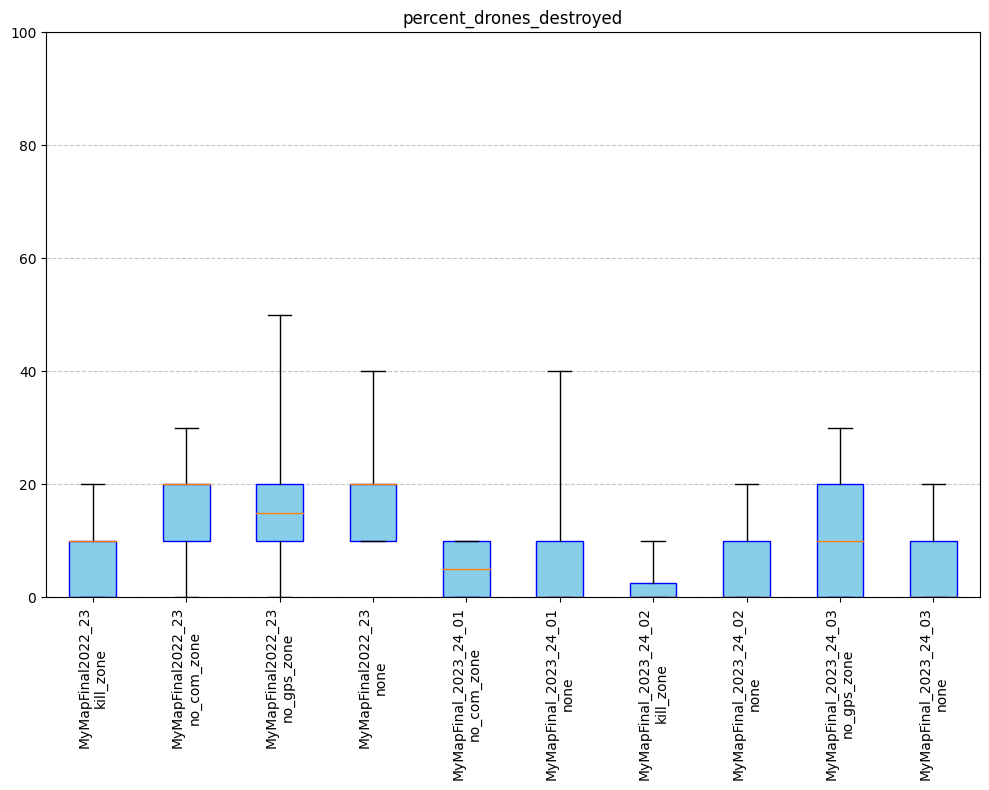

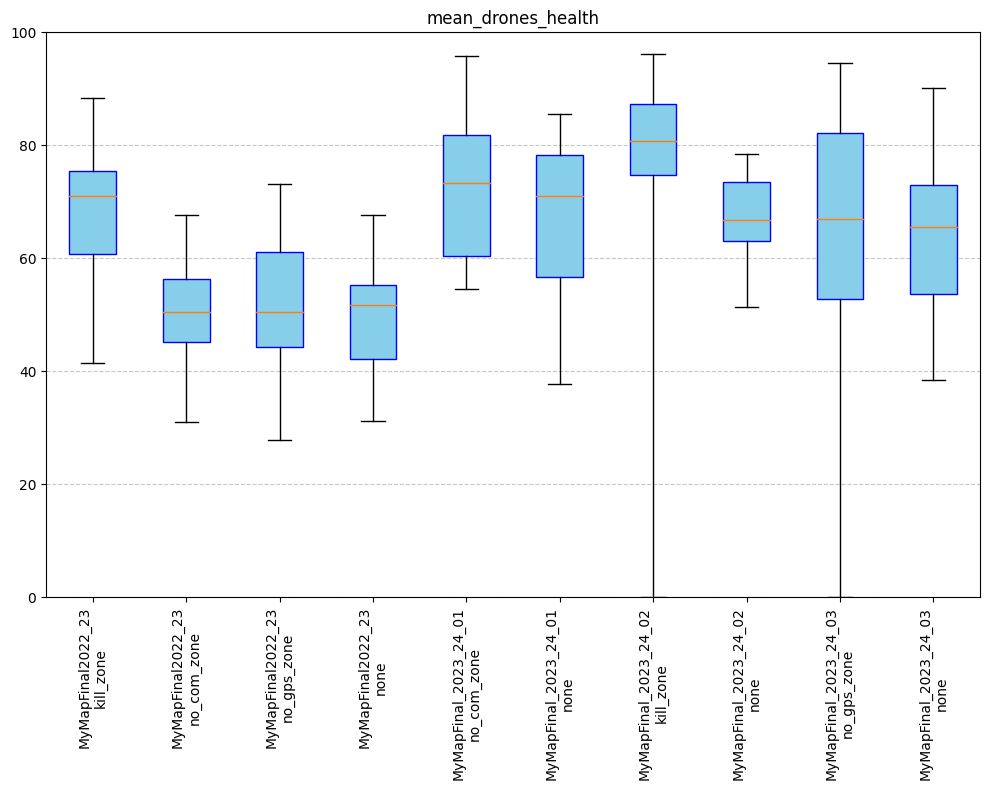

In [24]:
total_score = []
old_score = []
count = 0
old_map_weight = 0

for map_name in (scores["score"].keys()):
    if "22-23" in map_name:
        total_score.append(old_map_weight*np.mean(scores["score"][map_name]))
        old_score.append(old_map_weight*(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name])))
        count += old_map_weight
    else:
        total_score.append(np.mean(scores["score"][map_name]))
        old_score.append(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name]))
        count += 1
print("Mean score:",sum(total_score)/count)
print("Old score:",sum(old_score)/count)

for name in score_names:
    plot_score(scores[name], name)

In [21]:
grouped_data = defaultdict(list)
for entry in data:
    grouped_data[entry["map_name"]+"_"+entry["zones"]].append(entry)

# Find the 5 lowest scores for each map_name
result = {}
for map_name, entries in grouped_data.items():
    # Sort entries by score
    sorted_entries = sorted(entries, key=lambda x: x["score"])
    # Take the top 5 lowest scores
    lowest_scores = sorted_entries[:5]
    # Extract filename_video_capture
    result[map_name] = [entry["filename_video_capture"] for entry in lowest_scores]

# Print the result
print(json.dumps(result, indent=4))

{
    "MyMapFinal2022_23_no_gps_zone": [
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/18d4e800-0f3b-4d72-82ca-7baa4bdbcb90_map_MyMapFinal2022_23_zone_NO_GPS_ZONE/videos/team01_MyMapFinal2022_23_no_gps_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/e20a2241-6597-414b-af97-eb718cba381c_map_MyMapFinal2022_23_zone_NO_GPS_ZONE/videos/team01_MyMapFinal2022_23_no_gps_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/4e2f9662-d9d1-4559-8717-f4ae26b64b4c_map_MyMapFinal2022_23_zone_NO_GPS_ZONE/videos/team01_MyMapFinal2022_23_no_gps_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/a3a08b7f-d9be-4fc1-89b9-bf6e5d2202d4_map_MyMapFinal2022_23_zone_NO_GPS_ZONE/videos/team01_MyMapFinal2022_23_no_gps_zone.avi",
        "/home/infres/hverninas-22/results_swarm_rescue/team01_241223_03h08min16s/98558e96-24b2-4c52-82b9-0f788c94c579_map_MyMa